In [9]:
#!pip install ipywidgets
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install quandl
#!pip install statsmodels 
#!pip install gs_quant
#!pip install -U git+https://github.com/twopirllc/pandas-ta
#!pip install finta
#!pip install alpha_vantage
#!pip install pandas-datareader
#!pip install --upgrade ta
#!pip install -U scikit-learn
#!pip install scipy
#!pip install hmmlearn==0.2.3
#!pip install yfinance
#!pip install datetime
#!pip install Pyfolio
#!pip install zipline
#!pip install alphalens
#!pip install seaborn

#!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
#!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
#!dpkg -i libta.deb ta.deb
#!pip install ta-lib

#import pyfolio as pf
#import alphalens
from ipywidgets import interact, fixed, IntSlider
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from matplotlib import style
import numpy as np
import pandas as pd 
import pandas_datareader.data as web
#from pandas_datareader import data as pdr
import datetime
from datetime import date
import yfinance as yf
import ta as ta
#from ytd import SimpleSymbolDownloader
#import ystockquote
#import quandl
import statsmodels.api as sm
#import gs_quant as gs
#import gs_quant.timeseries as ts
#from gs_quant.timeseries import Window
import os
#import talib
#import pandas_ta as ta
#import finta as tia
#import alpha_vantage as av
#from alpha_vantage.timeseries import TimeSeries
#from alpha_vantage.techindicators import TechIndicators
#import ta as uta 
#https://github.com/bukosabino/ta
import scipy as sp
from scipy.stats import theilslopes , linregress
from scipy.ndimage import gaussian_filter1d , generic_filter1d
import scipy.signal as signal
import scipy.interpolate as si
#import hmmlearn
#from hmmlearn.hmm import GaussianHMM
#import zipline as zipl
#from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
#from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression
yf.pdr_override()

[*********************100%***********************]  1 of 1 completed


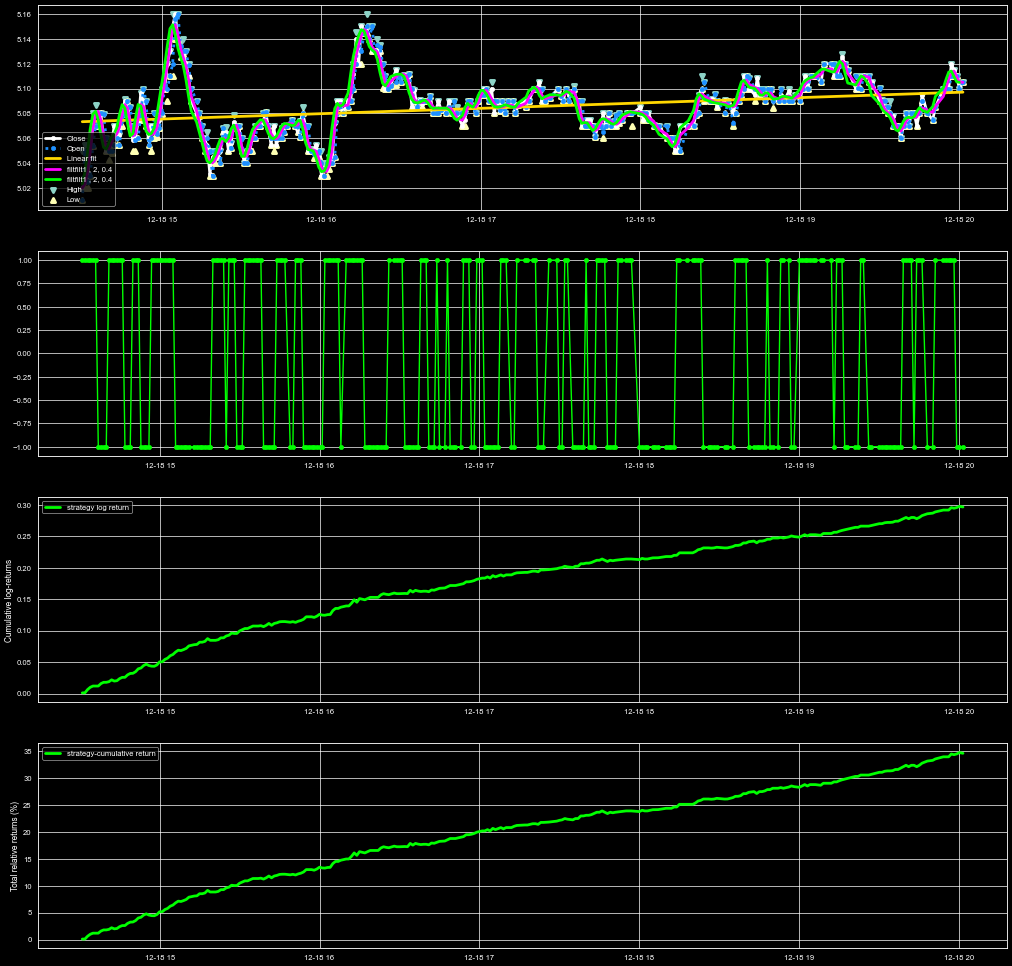

s =  1.1947632067448674e-15 
 r =  0.2939956904983875 
 p =  3.596224325076089e-07 
 s =  2.292820299373389e-16


In [31]:
tick = 'fngd'
time = '1m'
day = '1d'
lw = 4

#Valid intervals 1m, 2m, 5m, 15m,
# 1d, 5d, 1wk, 1mo, 3mo
sns.set(style="darkgrid", context="notebook",)
plt.style.use(['dark_background'])

lists = ['spy','^ovx','^vix','vxx','vixy','uvxy','soxl','drip','gush',
        'soxs','tecl','tecs','dust','nugt','jdst','jnug','drv','drn',
        'ery','erx','fngd','fngu','fas','faz','labd','labu','yang',
        'yinn','dslv','uco','sco','dug','tpor','saa','ubot','smll',
        'dig','tza','tna','dfen','cure','webl','webs','nail','pill',
        'hibs','hibl','spxs','spxl','tqqq','sqqq','dpst','nrgd','smhb',
        'retl','urty','midu','umdd','bnku','mexx','vixm','xvz','boil',
         'kold','nrgu','nrgd','nq=f','RTY=F','^VXN','^NDX','^RUT','^GSPC']


data = web.get_data_yahoo(tick,period= day,interval= time)

b, a = signal.butter(2, 0.4)
data['filtfilt']= signal.filtfilt(b,a, x=data.Close,)
data['filtfilt2']= signal.filtfilt(b,a, x=data.Close,)
data.filtfilt2 = data.filtfilt2.shift(periods=-1)

y=np.array(data.Close.dropna().values, dtype=float)
x=np.array(pd.to_datetime(data.Close.dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept

#data['rolin']= xf1, yf,label='Linear fit', lw=3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(25,25), dpi=50)

ax1.plot(data.Close,linestyle='-', marker='o',lw=lw,label='Close',c='white')
ax1.plot(data.Open,linestyle=':', marker='o',lw=lw,label='Open',c='dodgerblue')
ax1.scatter(x=data.index,y=data.High,linestyle='-', marker='v',lw=lw,label='High')
ax1.scatter(x=data.index,y=data.Low,linestyle='-', marker='^',lw=lw,label='Low')
ax1.plot(xf1, yf,label='Linear fit',lw=lw,c='gold')
ax1.plot(data.filtfilt,label='filtfilt1 , 2, 0.4',lw=lw,c='fuchsia')
ax1.plot(data.filtfilt2,label='filtfilt1 , 2, 0.4',lw=lw,c='lime')
ax1.grid(b=True,which='minor',)
ax1.legend(loc='lower left')
#plt.show()

trading_positions_raw =  data.filtfilt.shift(periods= -1) - data.filtfilt
trading_positions = trading_positions_raw.apply(np.sign)
trading_final = trading_positions.shift(1)
ax2.plot(trading_final, linestyle='-', marker='o', lw=2,label='regime',c='lime')
ax2.grid(b=True,which='minor',)
#plt.show()

trading_final.tail()
close_log = np.log(data.Close).diff()

strategy_returns = trading_final * close_log # To get all the strategy_returns for all days

# log-returns can be added to show performance across time, 
# so, plotted the cumulative log-returns and the cumulative total relative returns.
strategy_returns.tail()
# Get the cumulative log-returns per asset
strategy_returns_cum = strategy_returns.cumsum()

# Transform the cumulative log returns to relative returns
strategy_returns_relative = np.exp(strategy_returns_cum) - 1

ax3.plot(strategy_returns_cum, label='strategy log return',lw=4,c='lime')
ax3.set_ylabel('Cumulative log-returns')
ax3.legend(loc='best')

ax4.plot(100*strategy_returns_relative, label='strategy-cumulative return',lw=4,c='lime')
ax4.set_ylabel('Total relative returns (%)')
ax4.legend(loc='best')
plt.show()
print('s = ', slope, '\n','r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)


[*********************100%***********************]  1 of 1 completed


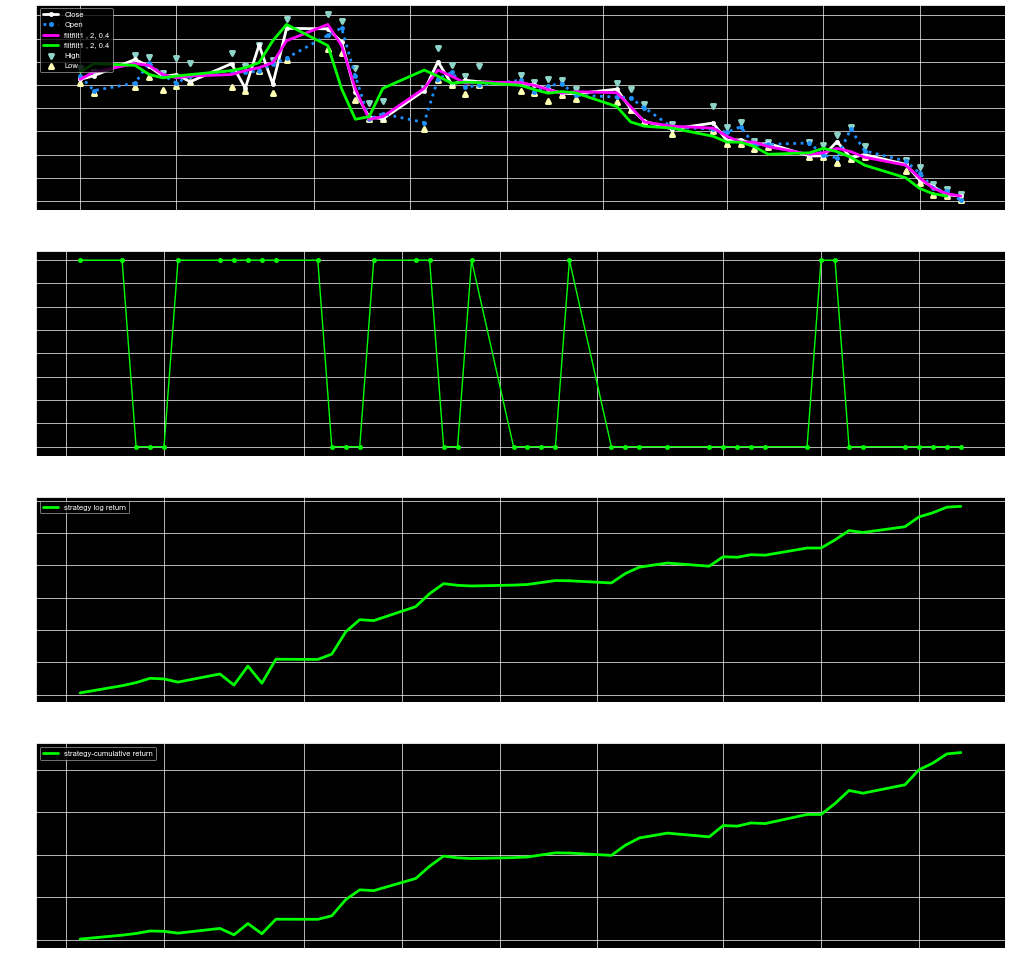

In [32]:
%matplotlib inline
start = datetime.datetime(2020,10,15)
end =  datetime.datetime.today()

df = web.DataReader(tick,data_source='yahoo', start=start, end=end,)

b, a = signal.butter(2, 0.6)

df['filtfilt']= signal.filtfilt(b,a, x=df.Close,)
df['filtfilt2']= signal.filtfilt(b,a, x=df.Close,)
df.filtfilt2 = df.filtfilt2.shift(periods=-1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(25,25), dpi=50,) 

ax1.plot(df.Close,linestyle='-', marker='o',lw=lw,label='Close',c='white')
ax1.plot(df.Open,linestyle=':', marker='o',lw=lw,label='Open',c='dodgerblue')
ax1.scatter(x= df.index,y=df.High,linestyle='-', marker='v',lw=lw,label='High')
ax1.scatter(x= df.index,y=df.Low,linestyle='-', marker='^',lw=lw,label='Low')
ax1.plot(df.filtfilt,label='filtfilt1 , 2, 0.4',lw=lw,c='fuchsia')
ax1.plot(df.filtfilt2,label='filtfilt1 , 2, 0.4',lw=lw,c='lime')
ax1.grid(b=True,which='minor',)

ax1.legend(loc='upper left')

trading_positions_raw =  df.filtfilt.shift(periods= -1) - df.filtfilt
trading_positions = trading_positions_raw.apply(np.sign)
trading_final = trading_positions.shift(1)
ax2.plot(trading_final, linestyle='-', marker='o', lw=2,label='regime',c='lime')
ax2.grid(b=True,which='minor',)

trading_final.tail()
close_log = np.log(df.Close).diff()

strategy_returns = trading_final * close_log # To get all the strategy_returns for all days

# log-returns can be added to show performance across time, 
# so, plotted the cumulative log-returns and the cumulative total relative returns.
strategy_returns.tail()
# Get the cumulative log-returns per asset
strategy_returns_cum = strategy_returns.cumsum()

# Transform the cumulative log returns to relative returns
strategy_returns_relative = np.exp(strategy_returns_cum) - 1

ax3.plot(strategy_returns_cum, label='strategy log return',lw=4,c='lime')
ax3.set_ylabel('Cumulative log-returns')
ax3.legend(loc='best')

ax4.plot(100*strategy_returns_relative, label='strategy-cumulative return',lw=4,c='lime')
ax4.set_ylabel('Total relative returns (%)')
ax4.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


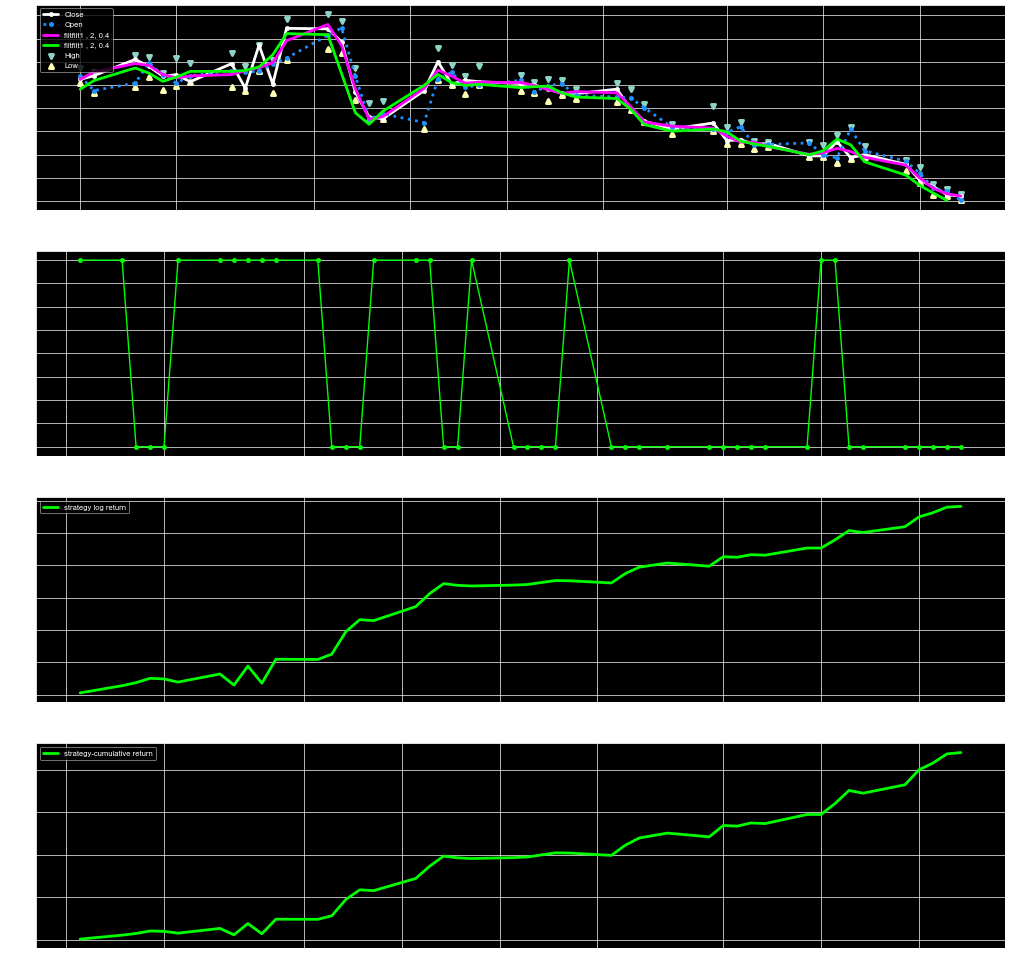

In [33]:
%matplotlib inline
#start = datetime.datetime(2020,9,1)
end =  datetime.datetime.today()

df = web.DataReader(tick,data_source='yahoo', start=start, end=end,)

b, a = signal.butter(2, 0.6)

df['filtfilt']= signal.filtfilt(b,a, x=df.Close,)
df['filtfilt2']= signal.filtfilt(b,a, x=df.Open,)
df.filtfilt2 = df.filtfilt2.shift(periods=-1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(25,25), dpi=50,) 

ax1.plot(df.Close,linestyle='-', marker='o',lw=lw,label='Close',c='white')
ax1.plot(df.Open,linestyle=':', marker='o',lw=lw,label='Open',c='dodgerblue')
ax1.scatter(x= df.index,y=df.High,linestyle='-', marker='v',lw=lw,label='High')
ax1.scatter(x= df.index,y=df.Low,linestyle='-', marker='^',lw=lw,label='Low')
ax1.plot(df.filtfilt,label='filtfilt1 , 2, 0.4',lw=lw,c='fuchsia')
ax1.plot(df.filtfilt2,label='filtfilt1 , 2, 0.4',lw=lw,c='lime')
ax1.grid(b=True,which='minor',)

ax1.legend(loc='upper left')

trading_positions_raw =  df.filtfilt.shift(periods= -1) - df.filtfilt
trading_positions = trading_positions_raw.apply(np.sign)
trading_final = trading_positions.shift(1)
ax2.plot(trading_final, linestyle='-', marker='o', lw=2,label='regime',c='lime')
ax2.grid(b=True,which='minor',)

trading_final.tail()
close_log = np.log(df.Close).diff()

strategy_returns = trading_final * close_log # To get all the strategy_returns for all days

# log-returns can be added to show performance across time, 
# so, plotted the cumulative log-returns and the cumulative total relative returns.
strategy_returns.tail()
# Get the cumulative log-returns per asset
strategy_returns_cum = strategy_returns.cumsum()

# Transform the cumulative log returns to relative returns
strategy_returns_relative = np.exp(strategy_returns_cum) - 1

ax3.plot(strategy_returns_cum, label='strategy log return',lw=4,c='lime')
ax3.set_ylabel('Cumulative log-returns')
ax3.legend(loc='best')

ax4.plot(100*strategy_returns_relative, label='strategy-cumulative return',lw=4,c='lime')
ax4.set_ylabel('Total relative returns (%)')
ax4.legend(loc='best')
plt.show()

[*********************100%***********************]  71 of 71 completed

1 Failed download:
- SMLL: No data found for this date range, symbol may be delisted


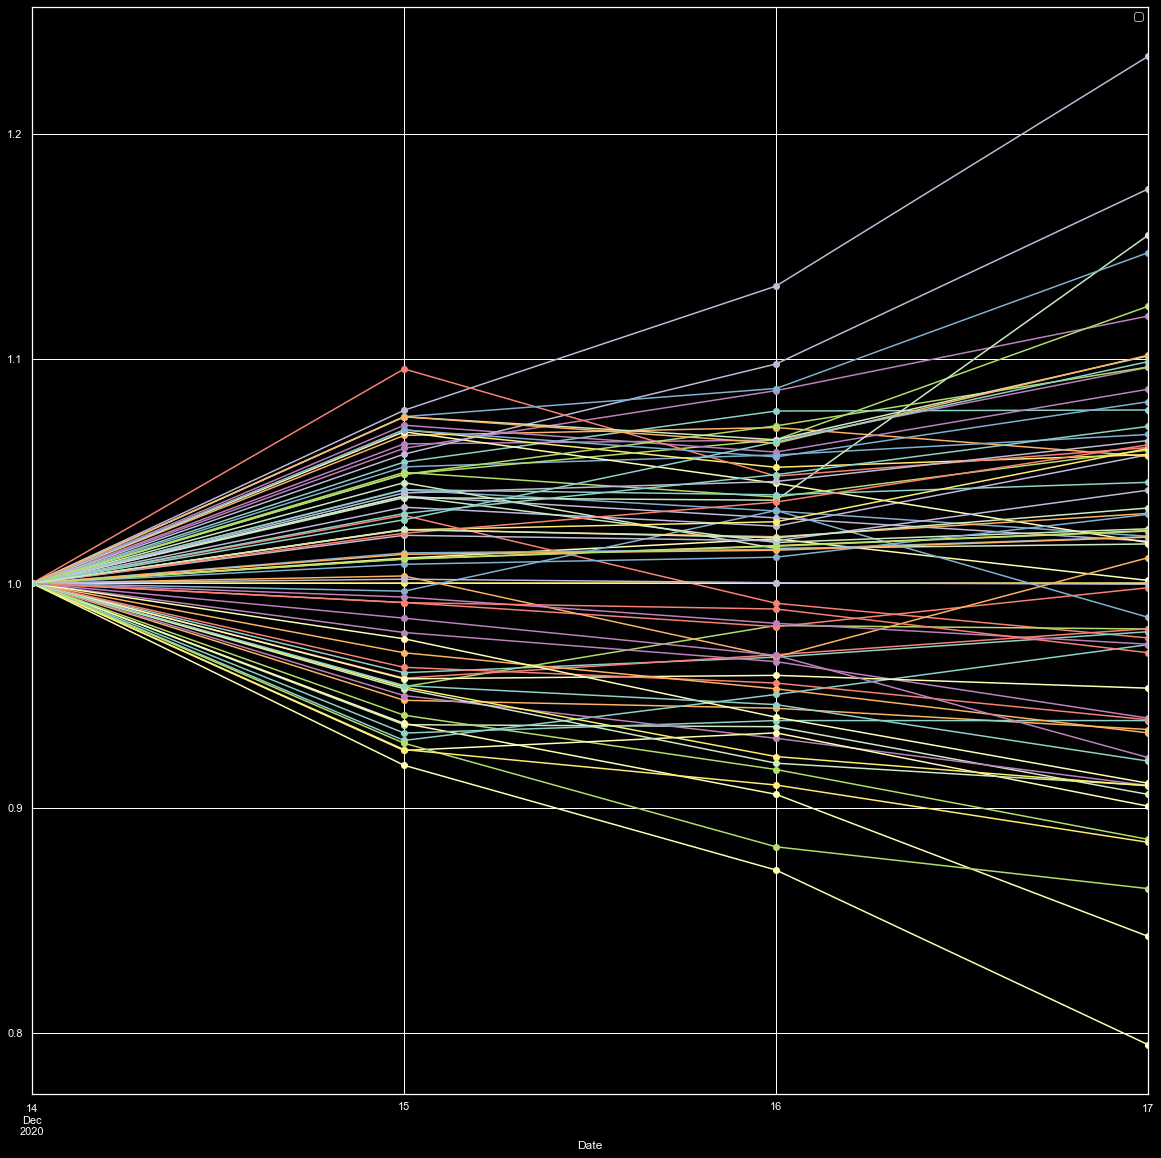

In [13]:
sns.set(style="darkgrid", context="notebook",)
plt.style.use(['dark_background'])

ass = web.DataReader(lists,data_source='yahoo',
                     start= datetime.datetime(2020,12,14),end= end)                                      
ret = (ass.Close/ass.Close.iloc[0]).fillna(method='ffill')
ret.plot(figsize=(20,20),linestyle='-', marker='o',)
plt.grid(b=True,which='minor',)
plt.legend([])
plt.show()



In [14]:
len(ret)
retslide = IntSlider(value=20)
looksbackslide = IntSlider(value=6)
#looksbackslide.value
retslide


IntSlider(value=20)

In [15]:
ret.iloc[-1].nlargest(retslide.value)

JNUG    1.234622
NUGT    1.175562
NAIL    1.154967
RETL    1.147213
MEXX    1.123361
FNGU    1.118980
URTY    1.101558
TNA     1.101239
WEBL    1.098697
TECL    1.096290
DRN     1.096088
MIDU    1.086413
UMDD    1.080835
BNKU    1.077178
TQQQ    1.069868
FAS     1.066274
SPXL    1.063564
UCO     1.061650
PILL    1.060455
TPOR    1.060056
Name: 2020-12-17 00:00:00, dtype: float64

https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/

https://medium.com/@patrick.collins_58673/stock-api-landscape-5c6e054ee631

https://docs.pymc.io/nb_examples/index.html

https://www.youtube.com/watch?v=AFrIvOeztbM&list=PLRFLF1OxMm_VdDSn1BVd7bGKGak5Uss89&index=2

In [18]:

from IPython.display import YouTubeVideo
YouTubeVideo('')

https://anaconda.cloud/tutorials/4038ae58-286a-4fdc-b8bf-b4b257e2edf3
Easy Plotting for Streaming Data and panels

http://holoviews.org/reference/streams/bokeh/heatmap_tap.html
https://panel.holoviz.org/gallery/index.html
https://panel.holoviz.org/gallery/apis/stocks_hvplot.html#apis-gallery-stocks-hvplot